In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [20]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Jamboree/Jamboree_Admission.csv')

In [21]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
df1=df

In [23]:
#Check null value
df1.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

No null values found

In [24]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [25]:
#Check for duplicates
df1.duplicated().sum()

0

No duplicates found

In [26]:
#Renaming LOR as space is there in column name
df.rename(columns={'LOR ':'LOR','Chance of Admit ': 'Chance of Admit'},inplace=True)

In [27]:
#Check unique value count 
df.dtypes
for i in ('Research','University Rating','SOP','LOR'):
  print(f'****{i}****')
  print(df[i].value_counts())

****Research****
1    280
0    220
Name: Research, dtype: int64
****University Rating****
3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64
****SOP****
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64
****LOR****
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64


In [28]:
#DROPPING SERIAL NO-UNWANTED COLUMN
df.drop(columns='Serial No.',axis=1,inplace=True)

### Univariate Analysis

CGPA
GRE Score
TOEFL Score
Research
Chance of Admit


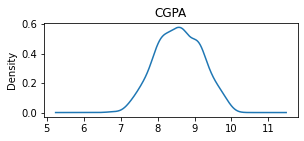

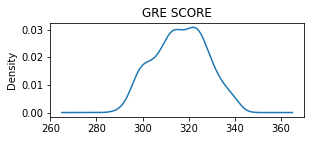

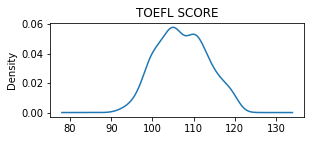

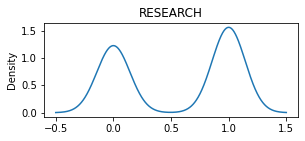

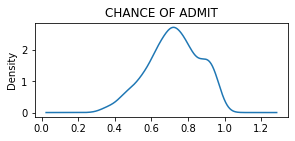

In [29]:
#Plotting distribution plot
p=['CGPA','GRE Score','TOEFL Score','Research','Chance of Admit']

ncols=2
nrows=len(p)
for i,j in enumerate(p):
  
    print(j)
    # add a new subplot iteratively using nrows and cols
    plt.figure(figsize=(10,10))
    ax = plt.subplot(nrows, ncols, i + 1)
    
    # filter df and plot ticker on the new subplot axis
    df[j].plot(kind='kde',ax=ax)

    # chart formatting
    ax.set_title(j.upper())
    
    ax.set_xlabel("")

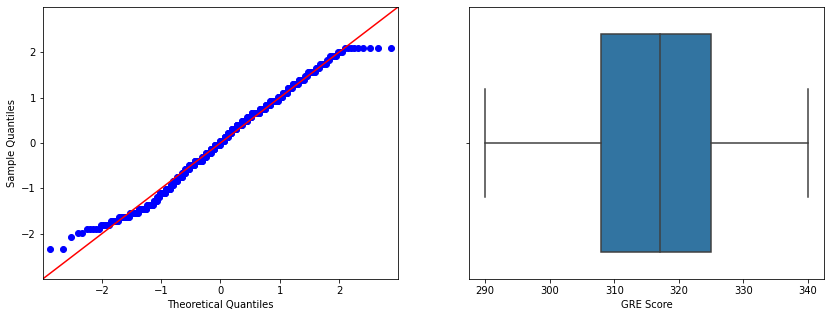

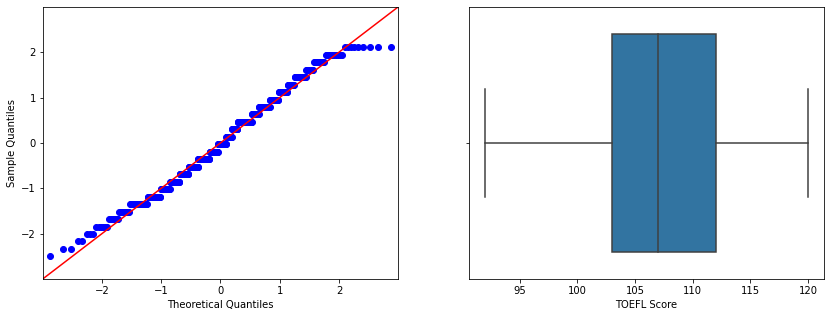

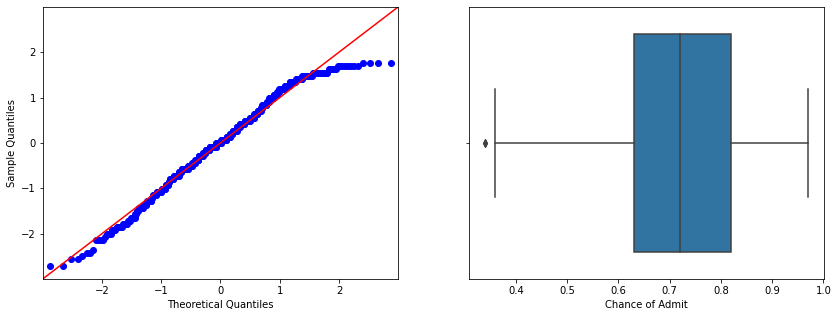

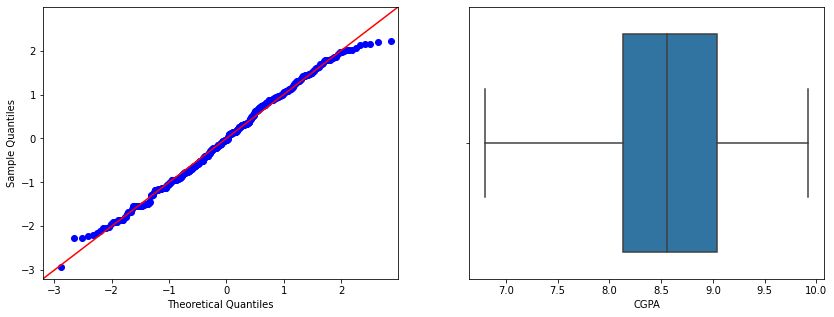

In [30]:
#qq plot
p=['GRE Score','TOEFL Score','Chance of Admit','CGPA']
for i in p:
   fig,axes=plt.subplots(1,2,figsize=(14,5))
   sm.qqplot(df[i],line='45',fit=True,ax=axes[0])
   sns.boxplot(data=df,x=i)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

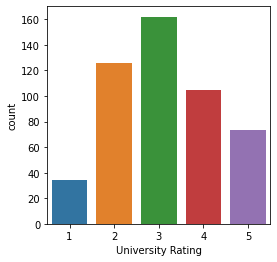

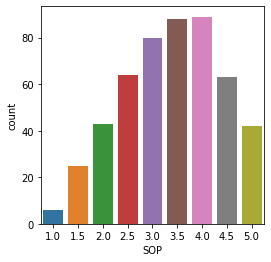

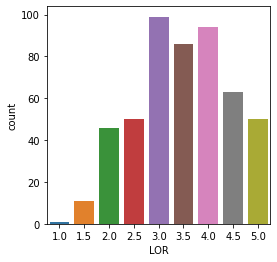

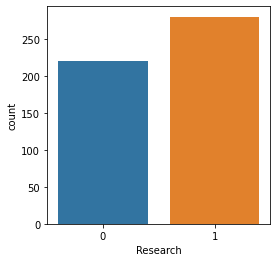

In [116]:
for i in ['University Rating','SOP','LOR','Research']:
    fig,axes=plt.subplots(1,1,figsize=(4,4))
    sns.countplot(df[i])

### Bivariate Analysis

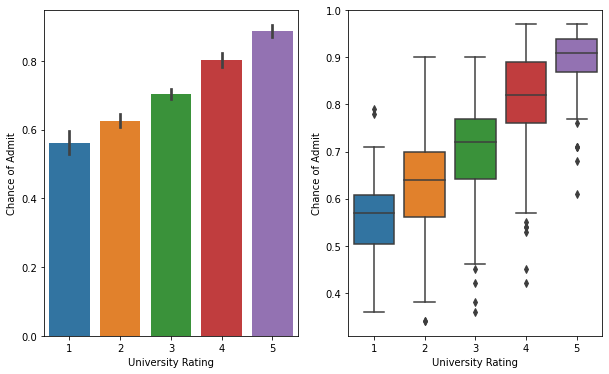

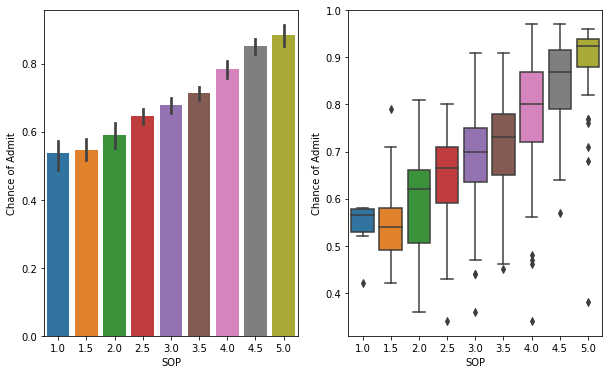

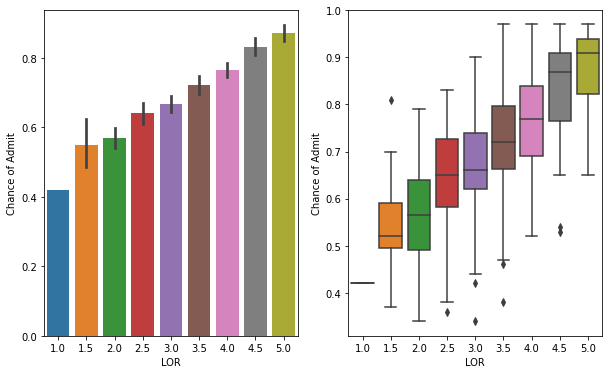

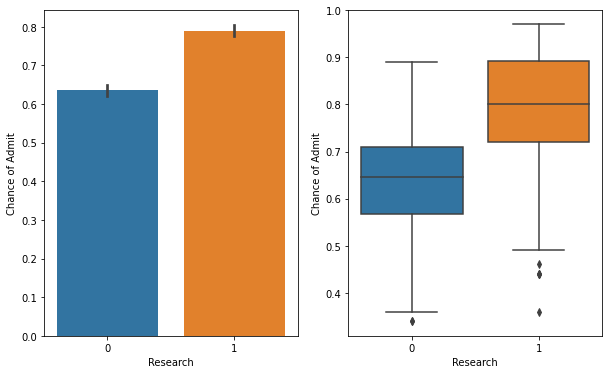

In [119]:
for i in ['University Rating','SOP','LOR','Research']:
    fig,axes=plt.subplots(1,2,figsize=(10,6))
    sns.barplot(x=df[i],y=df['Chance of Admit'],ax=axes[0])
    sns.boxplot(x=df[i],y=df['Chance of Admit'],ax=axes[1])

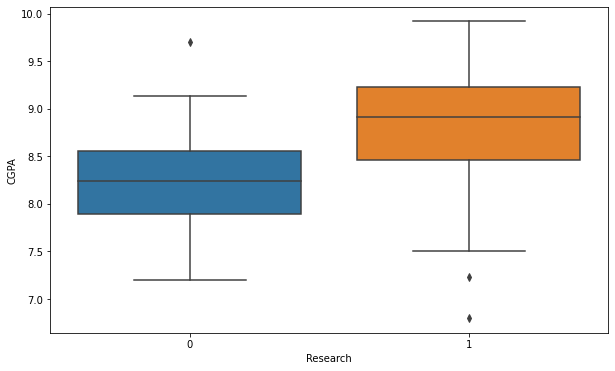

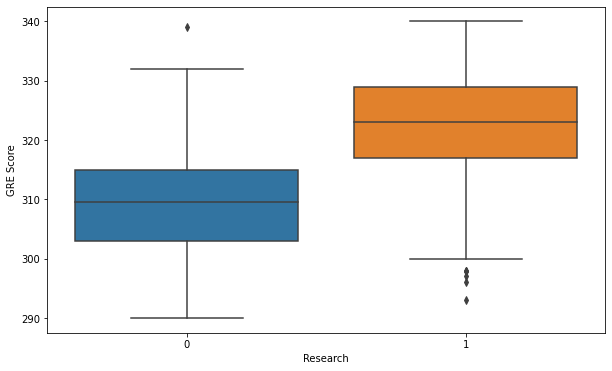

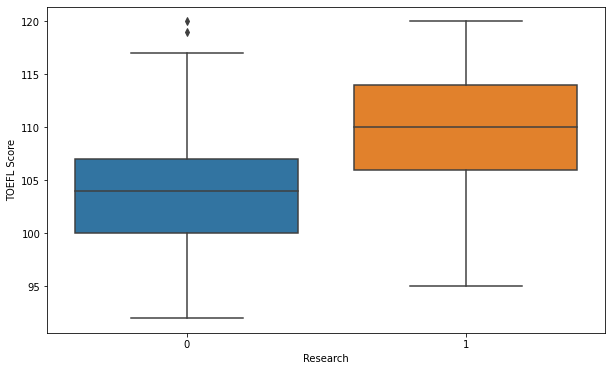

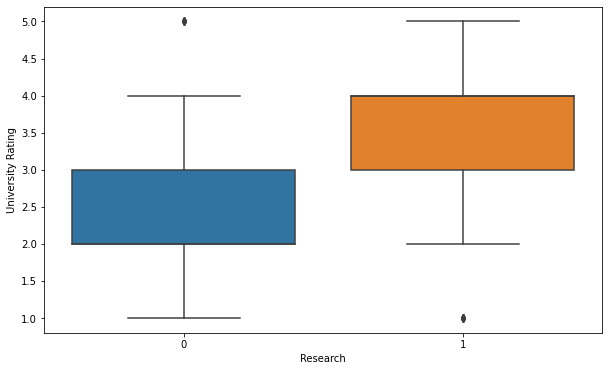

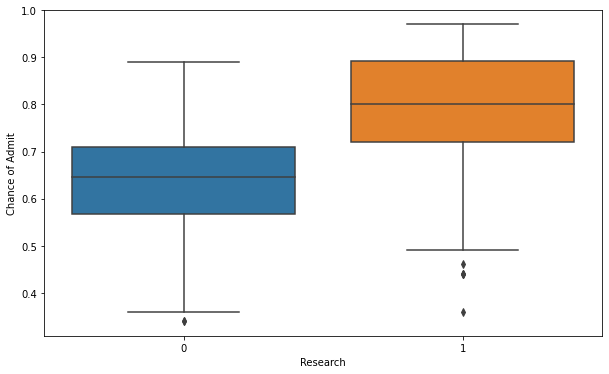

In [139]:
#Impact of doin research 

for i in ['CGPA','GRE Score','TOEFL Score','University Rating','Chance of Admit']:
    fig,axes=plt.subplots(1,figsize=(10,6))
    sns.boxplot(y=df[i],x=df['Research'])
    

1.People who has done research has good chance of getting into MS with probability of 80% whereas non-research students has 0.65% probability

2.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Research')

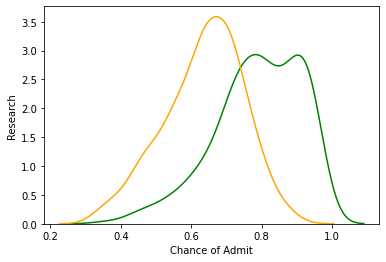

In [31]:
sns.distplot(df[df['Research']==1]['Chance of Admit'],hist=False,color='Green')
sns.distplot(df[df['Research']==0]['Chance of Admit'],hist=False,color='Orange')
plt.ylabel('Research')

Research done people has 80% average probability of getting into MS

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

0
1
2
3
4


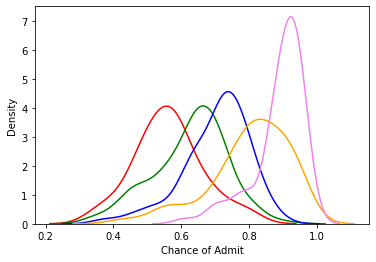

In [32]:
count1=[1,2,3,4,5]
color1=['Red','Green','Blue','Orange','Violet']
for i,j in enumerate(count1):
  sns.distplot(df[df['University Rating']==count1[i]]['Chance of Admit'],hist=False,color=color1[i])
  print(i)



University Rating with 4 or 5 has high chance of admit between 80 and 90

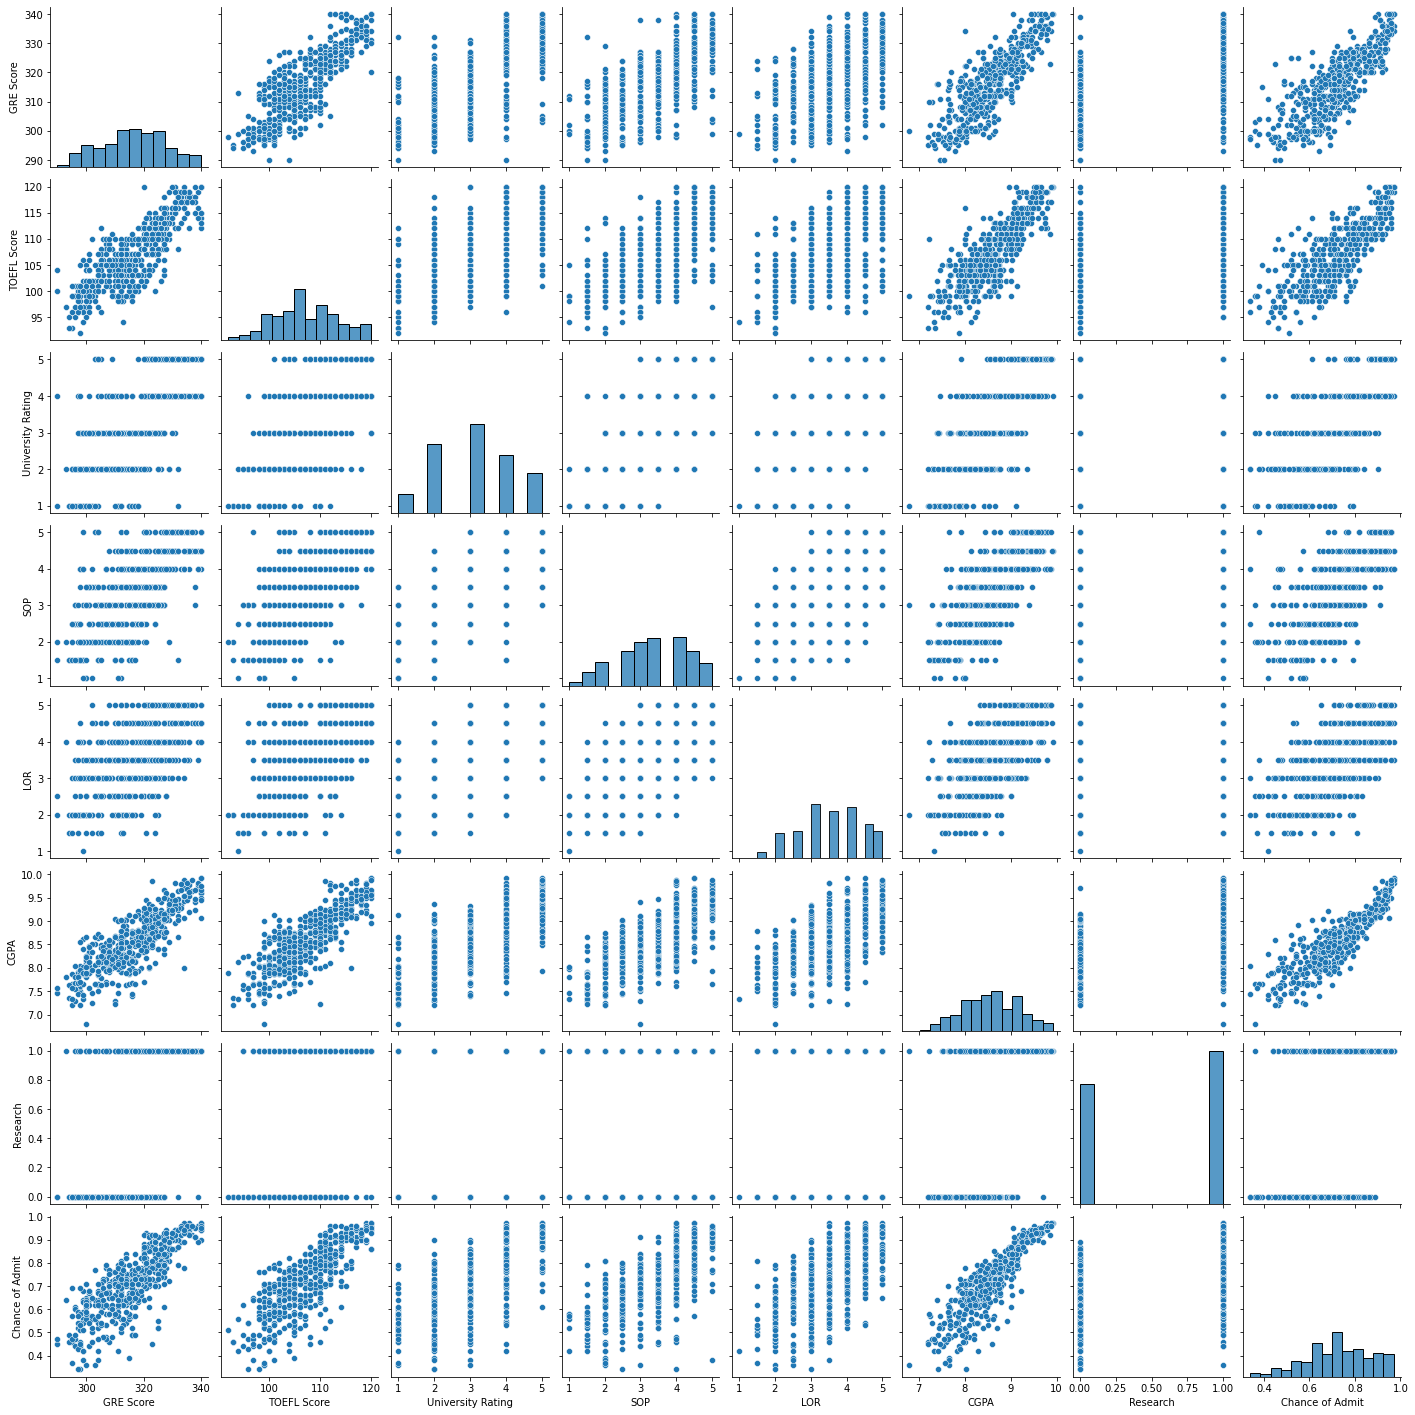

In [33]:
## Let's plot a pair plot of all variables in our dataframe
sns.pairplot(df)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


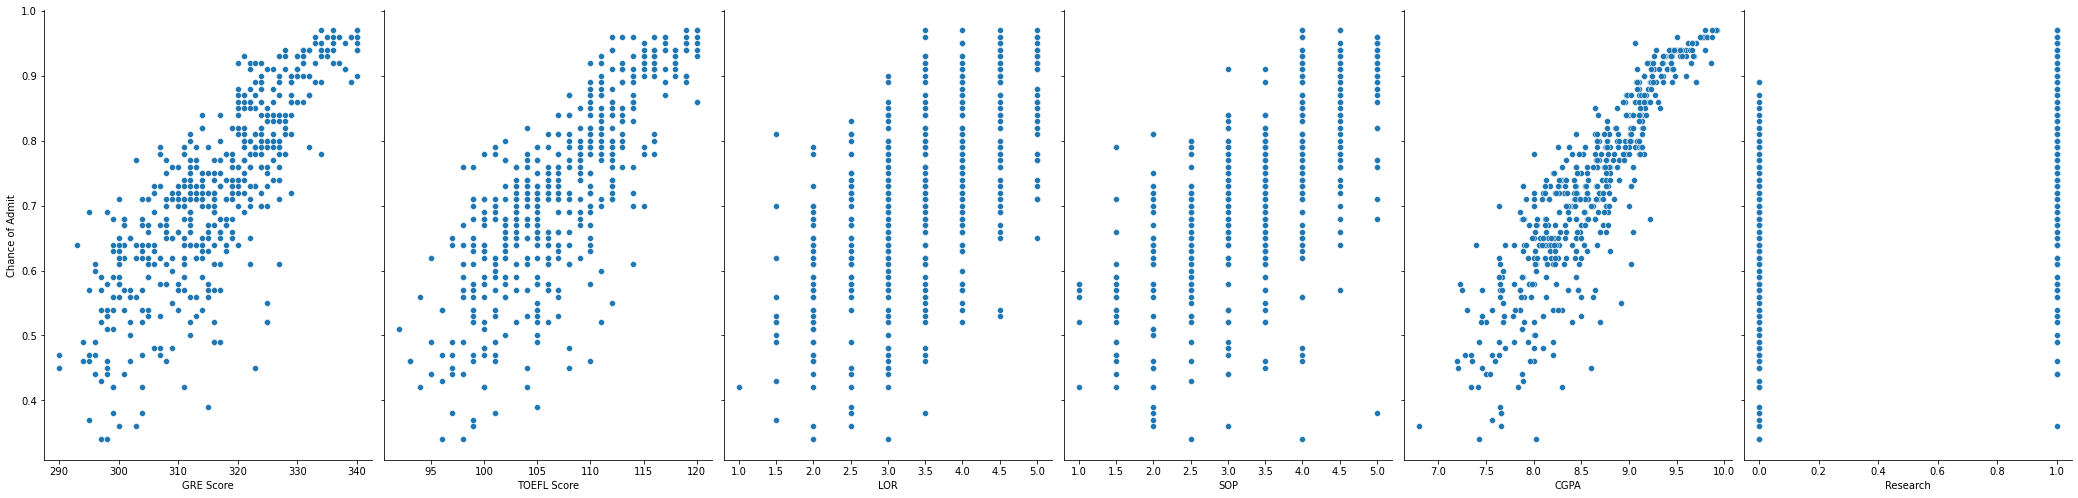

In [34]:
sns.pairplot(df, x_vars=['GRE Score','TOEFL Score','LOR','SOP','CGPA','Research'], y_vars='Chance of Admit',size=7, aspect=0.7, kind='scatter')

From the above figure chance of admit is highly correlated with the CGPA and nexr to it ,GRE Score and TOEFL Score

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


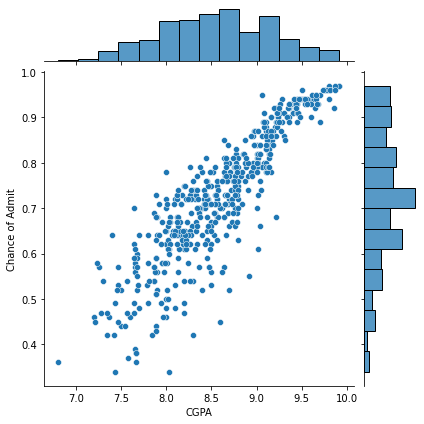

In [35]:
sns.jointplot(df['CGPA' ],df['Chance of Admit'])

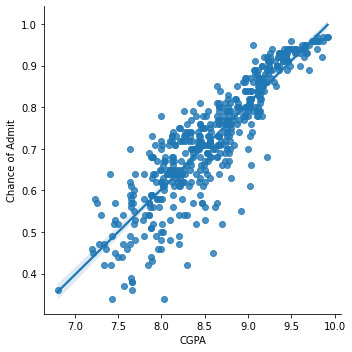

In [36]:
sns.lmplot(x='CGPA',y ='Chance of Admit', data=df)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [71]:
X = df[df.columns.drop('Chance of Admit')]
y=df['Chance of Admit']
sc = StandardScaler()
cols = X.columns
X[cols] = sc.fit_transform(X[cols])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Variance score: {}'.format(lm.score(X_test, y_test)))
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

Variance score: 0.8355717634850119
0.7182337995019021


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Coefficient
GRE Score,0.012748
TOEFL Score,0.021345
University Rating,0.005982
SOP,0.000547
LOR,0.015929
CGPA,0.077016
Research,0.013696


In [108]:
y_pred = lm.predict(X_test)
y_pred
train_score_lr = lm.score(X_train, y_train)
test_score_lr = lm.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

The train score for lr model is 0.8132510822066584
The test score for lr model is 0.8355717634850119
Mean_Squared_Error : 0.003409142513908772
r_square_value : 0.8355717634850119


Text(0, 0.5, 'Predicted Y')

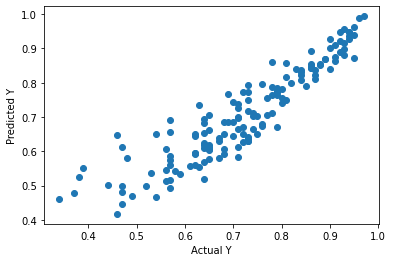

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

In [120]:
#Lasso and Ridge

params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2,  0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [121]:
print(model_cv.best_estimator_)
print(model_cv.best_score_)

Ridge()
-0.044429301383672584


In [127]:
lass1 = Lasso(alpha=10)
lass1.fit(X_train,y_train)
from sklearn.linear_model import LassoCV,RidgeCV
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)
#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))
print('Mean_Squared_Error :' ,round(mse,3))
print('r_square_value :',round(r_squared,3))
mae = round(sum(abs(y_test-y_pred)),3)
print('MAE :',mae)
adj_r2=(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1)
adj_r2=1-(adj_r2*(1-r_squared))
print('Adjusted R2 :',round(adj_r2,3))

0.8131628962864003
0.83622241557594


In [128]:
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)
#score
print(ridge_cv.score(X_train, y_train))
print(ridge_cv.score(X_test, y_test))

0.8132422775889485
0.83604630733065


From the above L1 and L2 regularisation,we could find that though both performs almost same,Ridge is slighly better than lasso

In [49]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003870,0.002629,0.002172,0.000655,0.0001,{'alpha': 0.0001},-0.042010,-0.042145,-0.043667,-0.048609,...,-0.044179,0.002401,2,-0.043268,-0.043,-0.043242,-0.041234,-0.042976,-0.042744,0.000765
1,0.002737,0.000305,0.001785,0.000139,0.001,{'alpha': 0.001},-0.042010,-0.042145,-0.043667,-0.048609,...,-0.044179,0.002401,1,-0.043268,-0.043,-0.043242,-0.041234,-0.042976,-0.042744,0.000765
2,0.002421,0.000066,0.001716,0.000114,0.01,{'alpha': 0.01},-0.042010,-0.042145,-0.043667,-0.048608,...,-0.044179,0.002400,3,-0.043268,-0.043,-0.043243,-0.041234,-0.042977,-0.042744,0.000764
3,0.002393,0.000058,0.001684,0.000024,0.05,{'alpha': 0.05},-0.042011,-0.042148,-0.043670,-0.048603,...,-0.044180,0.002398,4,-0.043268,-0.043,-0.043245,-0.041237,-0.042980,-0.042746,0.000764
4,0.002456,0.000145,0.001695,0.000039,0.1,{'alpha': 0.1},-0.042011,-0.042152,-0.043674,-0.048598,...,-0.044181,0.002395,5,-0.043268,-0.043,-0.043248,-0.041241,-0.042984,-0.042748,0.000763


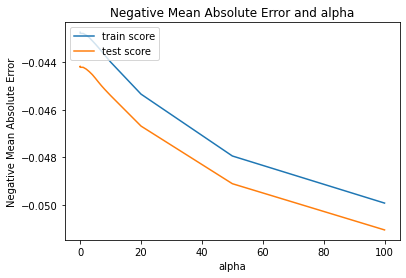

In [50]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Assumptions of Linear Regression


In [67]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()
# print the coefficients

lm_1.params

const    0.718073
x1       0.013237
x2       0.021930
x3       0.016699
x4       0.002799
x5       0.078165
x6       0.013927
dtype: float64

In [66]:
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     247.8
Date:                Tue, 03 Jan 2023   Prob (F-statistic):          2.02e-121
Time:                        16:21:49   Log-Likelihood:                 485.25
No. Observations:                 350   AIC:                            -956.5
Df Residuals:                     343   BIC:                            -929.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2378      0.125     -9.922      

array([[ 0.66714832, -0.36077656,  0.55812525, -0.37777315,  0.28725222,
        -1.12815215],
       [ 2.08510438,  1.28510191,  1.09894429,  1.13735981,  1.44579426,
         0.88640526],
       [ 0.31265931, -0.52536441,  0.01730621, -0.37777315,  0.27070162,
         0.88640526],
       ...,
       [-1.01667449, -0.8545401 , -1.06433187, -1.3878618 , -0.65613201,
        -1.12815215],
       [-0.48494097, -0.8545401 ,  0.55812525,  1.13735981,  0.10519562,
         0.88640526],
       [-1.28254125, -0.8545401 , -2.14596996, -1.3878618 , -0.95404281,
        -1.12815215]])

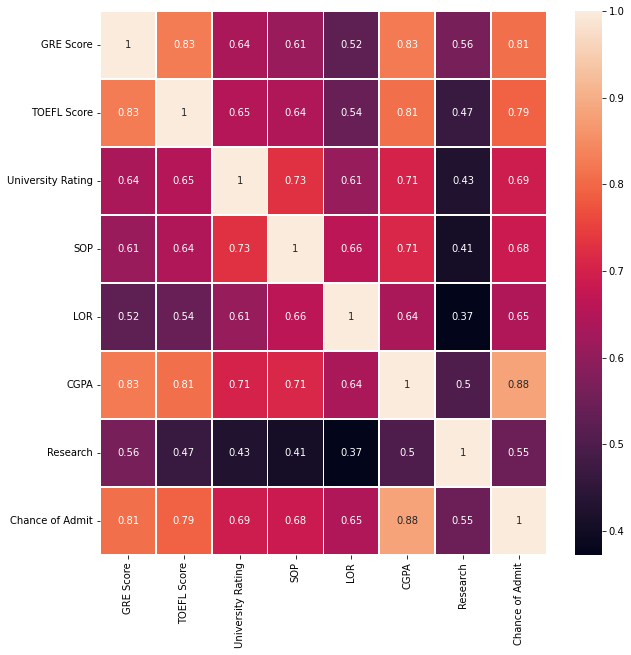

In [83]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), linewidth=0.5, annot=True)

In [140]:
#Check for correlation
print(df.corr())

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827200           0.635376  0.613498   
TOEFL Score         0.827200     1.000000           0.649799  0.644410   
University Rating   0.635376     0.649799           1.000000  0.728024   
SOP                 0.613498     0.644410           0.728024  1.000000   
LOR                 0.524679     0.541563           0.608651  0.663707   
CGPA                0.825878     0.810574           0.705254  0.712154   
Research            0.563398     0.467012           0.427047  0.408116   
Chance of Admit     0.810351     0.792228           0.690132  0.684137   

                        LOR      CGPA  Research  Chance of Admit  
GRE Score          0.524679  0.825878  0.563398         0.810351  
TOEFL Score        0.541563  0.810574  0.467012         0.792228  
University Rating  0.608651  0.705254  0.427047         0.690132  
SOP                0.663707  0.712154  0.408116         0.684137 

In [72]:
#Check for Multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = X_train
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,4.75
5,CGPA,4.69
1,TOEFL Score,3.73
3,SOP,2.73
2,University Rating,2.48
4,LOR,1.97
6,Research,1.49


As no VIF is greater than 5,we can safely assume that there is no multicollinearity

Text(0.5, 1.0, 'Histogram of residuals')

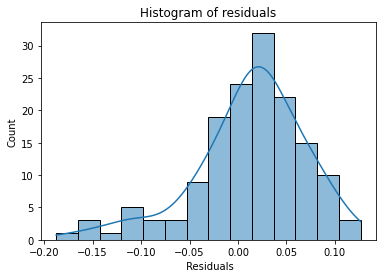

In [81]:
#Check mean of residuals

sns.histplot(y_test-y_pred,kde=True)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")


In [79]:
print('Mean is',(y_test-y_pred).mean())

Mean is 0.012222773667318266


Mean is 0.01 which is close to 0.

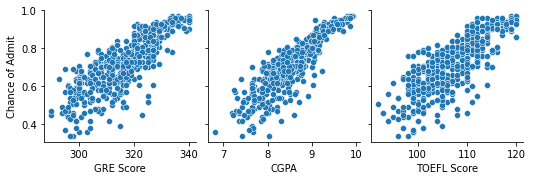

In [84]:
sns.pairplot(df, x_vars= ['GRE Score', 'CGPA', 'TOEFL Score'], y_vars = 'Chance of Admit', kind = 'scatter')

From the heatmap and correlation,we can find that chance of admit is linearly corelated with CGPA followed by GRE and TOEFL Scores

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted values vs Residuals')

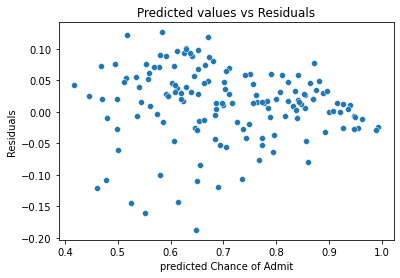

In [82]:
#heteroskedasticity
sns.scatterplot(y_pred,(y_test-y_pred))
plt.xlabel("predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

There is heteroskedasticity in our data

In [ ]:
#Autocorrealtion
#Couldnt find auto-correlation

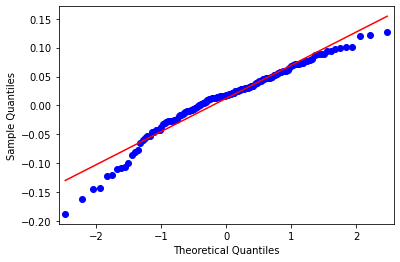

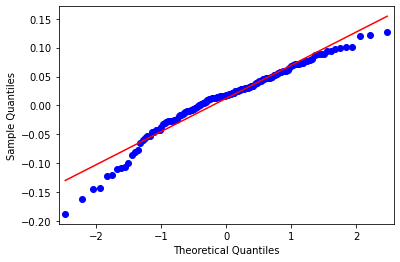

In [85]:
#Normality of resdiuals
sm.qqplot(y_test-y_pred, line ='s')

In [107]:
#Metrics of Linear Regression
print('Mean_Squared_Error :' ,round(mse,3))
print('r_square_value :',round(r_squared,3))
mae = round(sum(abs(y_test-y_pred)),3)
print('MAE :',mae)
adj_r2=(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1)
adj_r2=1-(adj_r2*(1-r_squared))
print('Adjusted R2 :',round(adj_r2,3))


Mean_Squared_Error : 0.003
r_square_value : 0.834
MAE : 6.868
Adjusted R2 : 0.832


NameError: ignored